In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Not really needed, but nicer plots
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

In [2]:
# Install TensorFlow by updating the conda environment

import tensorflow as tf
print('You have tensorflow version:', tf.__version__, '(must be at least 2.0.0)')

You have tensorflow version: 2.6.0 (must be at least 2.0.0)


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# The shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Each training label is an integer
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

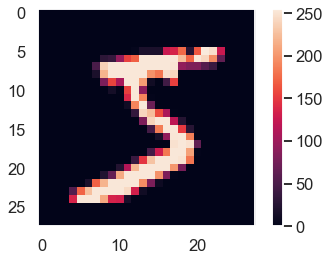

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

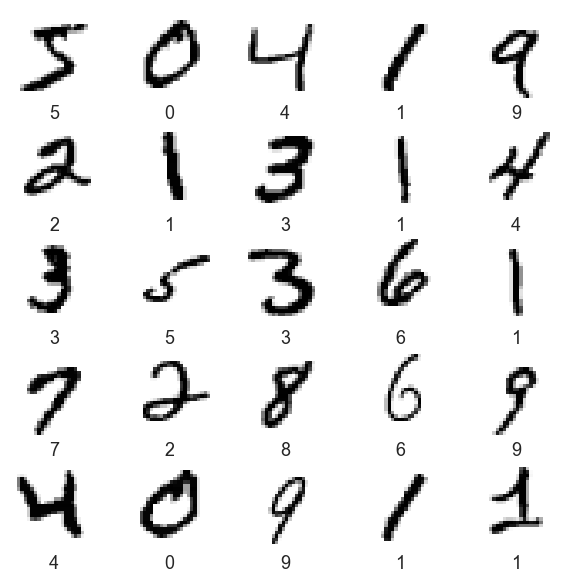

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))


In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2021-10-09 10:02:34.858946: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10)

2021-10-09 10:02:35.026565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


   1/1875 [..............................] - ETA: 9:05 - loss: 2.2326 - accuracy: 0.2188

  48/1875 [..............................] - ETA: 1s - loss: 1.2947 - accuracy: 0.6289  

  95/1875 [>.............................] - ETA: 1s - loss: 0.9580 - accuracy: 0.7214

 143/1875 [=>............................] - ETA: 1s - loss: 0.8198 - accuracy: 0.7625

 189/1875 [==>...........................] - ETA: 1s - loss: 0.7320 - accuracy: 0.7862

 236/1875 [==>...........................] - ETA: 1s - loss: 0.6738 - accuracy: 0.8043

 283/1875 [===>..........................] - ETA: 1s - loss: 0.6244 - accuracy: 0.8177

 329/1875 [====>.........................] - ETA: 1s - loss: 0.5897 - accuracy: 0.8275

 376/1875 [=====>........................] - ETA: 1s - loss: 0.5617 - accuracy: 0.8367

 423/1875 [=====>........................] - ETA: 1s - loss: 0.5365 - accuracy: 0.8435

 470/1875 [======>.......................] - ETA: 1s - loss: 0.5168 - accuracy: 0.8499

 516/1875 [=======>......................] - ETA: 1s - loss: 0.4963 - accuracy: 0.8558

 562/1875 [=======>......................] - ETA: 1s - loss: 0.4782 - accuracy: 0.8613

 609/1875 [========>.....................] - ETA: 1s - loss: 0.4618 - accuracy: 0.8657

 655/1875 [=========>....................] - ETA: 1s - loss: 0.4481 - accuracy: 0.8703

 702/1875 [==========>...................] - ETA: 1s - loss: 0.4359 - accuracy: 0.8743

 745/1875 [==========>...................] - ETA: 1s - loss: 0.4260 - accuracy: 0.8774

 791/1875 [===========>..................] - ETA: 1s - loss: 0.4190 - accuracy: 0.8793

 838/1875 [============>.................] - ETA: 1s - loss: 0.4083 - accuracy: 0.8827

 884/1875 [=============>................] - ETA: 1s - loss: 0.3994 - accuracy: 0.8851

 931/1875 [=============>................] - ETA: 1s - loss: 0.3926 - accuracy: 0.8870

 978/1875 [==============>...............] - ETA: 0s - loss: 0.3840 - accuracy: 0.8895

1024/1875 [===============>..............] - ETA: 0s - loss: 0.3777 - accuracy: 0.8913

1071/1875 [================>.............] - ETA: 0s - loss: 0.3703 - accuracy: 0.8934

1118/1875 [================>.............] - ETA: 0s - loss: 0.3632 - accuracy: 0.8955

1164/1875 [=================>............] - ETA: 0s - loss: 0.3573 - accuracy: 0.8972

1211/1875 [==================>...........] - ETA: 0s - loss: 0.3540 - accuracy: 0.8983

1258/1875 [===================>..........] - ETA: 0s - loss: 0.3491 - accuracy: 0.8999

1304/1875 [===================>..........] - ETA: 0s - loss: 0.3445 - accuracy: 0.9010

1351/1875 [====================>.........] - ETA: 0s - loss: 0.3395 - accuracy: 0.9024

1398/1875 [=====================>........] - ETA: 0s - loss: 0.3354 - accuracy: 0.9037

1446/1875 [======================>.......] - ETA: 0s - loss: 0.3307 - accuracy: 0.9048

1492/1875 [======================>.......] - ETA: 0s - loss: 0.3270 - accuracy: 0.9059

1537/1875 [=======================>......] - ETA: 0s - loss: 0.3231 - accuracy: 0.9069

1583/1875 [========================>.....] - ETA: 0s - loss: 0.3189 - accuracy: 0.9083

1630/1875 [=========================>....] - ETA: 0s - loss: 0.3152 - accuracy: 0.9092

1676/1875 [=========================>....] - ETA: 0s - loss: 0.3118 - accuracy: 0.9103

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3077 - accuracy: 0.9114

1769/1875 [===========================>..] - ETA: 0s - loss: 0.3046 - accuracy: 0.9123

1815/1875 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.9133

1862/1875 [============================>.] - ETA: 0s - loss: 0.2982 - accuracy: 0.9142

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2974 - accuracy: 0.9143


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0977 - accuracy: 1.0000

  48/1875 [..............................] - ETA: 1s - loss: 0.1457 - accuracy: 0.9544

  96/1875 [>.............................] - ETA: 1s - loss: 0.1544 - accuracy: 0.9557

 143/1875 [=>............................] - ETA: 1s - loss: 0.1537 - accuracy: 0.9545

 189/1875 [==>...........................] - ETA: 1s - loss: 0.1535 - accuracy: 0.9554

 236/1875 [==>...........................] - ETA: 1s - loss: 0.1537 - accuracy: 0.9547

 282/1875 [===>..........................] - ETA: 1s - loss: 0.1528 - accuracy: 0.9547

 329/1875 [====>.........................] - ETA: 1s - loss: 0.1535 - accuracy: 0.9547

 377/1875 [=====>........................] - ETA: 1s - loss: 0.1563 - accuracy: 0.9539

 424/1875 [=====>........................] - ETA: 1s - loss: 0.1554 - accuracy: 0.9543

 471/1875 [======>.......................] - ETA: 1s - loss: 0.1562 - accuracy: 0.9534

 516/1875 [=======>......................] - ETA: 1s - loss: 0.1576 - accuracy: 0.9539

 563/1875 [========>.....................] - ETA: 1s - loss: 0.1581 - accuracy: 0.9535

 610/1875 [========>.....................] - ETA: 1s - loss: 0.1566 - accuracy: 0.9537

 657/1875 [=========>....................] - ETA: 1s - loss: 0.1560 - accuracy: 0.9535

 705/1875 [==========>...................] - ETA: 1s - loss: 0.1551 - accuracy: 0.9535

 752/1875 [===========>..................] - ETA: 1s - loss: 0.1554 - accuracy: 0.9535

 799/1875 [===========>..................] - ETA: 1s - loss: 0.1548 - accuracy: 0.9535

 845/1875 [============>.................] - ETA: 1s - loss: 0.1541 - accuracy: 0.9540

 892/1875 [=============>................] - ETA: 1s - loss: 0.1547 - accuracy: 0.9538

 939/1875 [==============>...............] - ETA: 1s - loss: 0.1546 - accuracy: 0.9539

 986/1875 [==============>...............] - ETA: 0s - loss: 0.1533 - accuracy: 0.9544

1034/1875 [===============>..............] - ETA: 0s - loss: 0.1529 - accuracy: 0.9542

1081/1875 [================>.............] - ETA: 0s - loss: 0.1517 - accuracy: 0.9546

1129/1875 [=================>............] - ETA: 0s - loss: 0.1502 - accuracy: 0.9552

1177/1875 [=================>............] - ETA: 0s - loss: 0.1503 - accuracy: 0.9553

1224/1875 [==================>...........] - ETA: 0s - loss: 0.1497 - accuracy: 0.9554

1272/1875 [===================>..........] - ETA: 0s - loss: 0.1489 - accuracy: 0.9558

1320/1875 [====================>.........] - ETA: 0s - loss: 0.1489 - accuracy: 0.9555

1367/1875 [====================>.........] - ETA: 0s - loss: 0.1485 - accuracy: 0.9555

1414/1875 [=====================>........] - ETA: 0s - loss: 0.1483 - accuracy: 0.9555

1462/1875 [======================>.......] - ETA: 0s - loss: 0.1480 - accuracy: 0.9557

1509/1875 [=======================>......] - ETA: 0s - loss: 0.1483 - accuracy: 0.9554

1556/1875 [=======================>......] - ETA: 0s - loss: 0.1490 - accuracy: 0.9553

1603/1875 [========================>.....] - ETA: 0s - loss: 0.1493 - accuracy: 0.9552

1649/1875 [=========================>....] - ETA: 0s - loss: 0.1480 - accuracy: 0.9556

1696/1875 [==========================>...] - ETA: 0s - loss: 0.1482 - accuracy: 0.9555

1743/1875 [==========================>...] - ETA: 0s - loss: 0.1474 - accuracy: 0.9557

1790/1875 [===========================>..] - ETA: 0s - loss: 0.1468 - accuracy: 0.9560

1838/1875 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.9561

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1465 - accuracy: 0.9563


Epoch 3/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9375

  47/1875 [..............................] - ETA: 1s - loss: 0.1211 - accuracy: 0.9668

  95/1875 [>.............................] - ETA: 1s - loss: 0.1116 - accuracy: 0.9704

 143/1875 [=>............................] - ETA: 1s - loss: 0.0991 - accuracy: 0.9738

 190/1875 [==>...........................] - ETA: 1s - loss: 0.1036 - accuracy: 0.9719

 238/1875 [==>...........................] - ETA: 1s - loss: 0.1131 - accuracy: 0.9689

 284/1875 [===>..........................] - ETA: 1s - loss: 0.1109 - accuracy: 0.9689

 330/1875 [====>.........................] - ETA: 1s - loss: 0.1117 - accuracy: 0.9687

 378/1875 [=====>........................] - ETA: 1s - loss: 0.1112 - accuracy: 0.9682

 427/1875 [=====>........................] - ETA: 1s - loss: 0.1110 - accuracy: 0.9682

 472/1875 [======>.......................] - ETA: 1s - loss: 0.1115 - accuracy: 0.9678

 518/1875 [=======>......................] - ETA: 1s - loss: 0.1102 - accuracy: 0.9680

 560/1875 [=======>......................] - ETA: 1s - loss: 0.1110 - accuracy: 0.9675

 607/1875 [========>.....................] - ETA: 1s - loss: 0.1103 - accuracy: 0.9674

 654/1875 [=========>....................] - ETA: 1s - loss: 0.1091 - accuracy: 0.9681

 700/1875 [==========>...................] - ETA: 1s - loss: 0.1105 - accuracy: 0.9677

 746/1875 [==========>...................] - ETA: 1s - loss: 0.1106 - accuracy: 0.9677

 792/1875 [===========>..................] - ETA: 1s - loss: 0.1108 - accuracy: 0.9674

 838/1875 [============>.................] - ETA: 1s - loss: 0.1119 - accuracy: 0.9671

 885/1875 [=============>................] - ETA: 1s - loss: 0.1112 - accuracy: 0.9672

 931/1875 [=============>................] - ETA: 1s - loss: 0.1104 - accuracy: 0.9675

 978/1875 [==============>...............] - ETA: 0s - loss: 0.1099 - accuracy: 0.9675

1024/1875 [===============>..............] - ETA: 0s - loss: 0.1099 - accuracy: 0.9675

1069/1875 [================>.............] - ETA: 0s - loss: 0.1095 - accuracy: 0.9675

1114/1875 [================>.............] - ETA: 0s - loss: 0.1101 - accuracy: 0.9672

1161/1875 [=================>............] - ETA: 0s - loss: 0.1107 - accuracy: 0.9668

1208/1875 [==================>...........] - ETA: 0s - loss: 0.1099 - accuracy: 0.9670

1255/1875 [===================>..........] - ETA: 0s - loss: 0.1092 - accuracy: 0.9672

1303/1875 [===================>..........] - ETA: 0s - loss: 0.1092 - accuracy: 0.9673

1351/1875 [====================>.........] - ETA: 0s - loss: 0.1091 - accuracy: 0.9673

1397/1875 [=====================>........] - ETA: 0s - loss: 0.1090 - accuracy: 0.9675

1442/1875 [======================>.......] - ETA: 0s - loss: 0.1090 - accuracy: 0.9674

1489/1875 [======================>.......] - ETA: 0s - loss: 0.1090 - accuracy: 0.9674

1536/1875 [=======================>......] - ETA: 0s - loss: 0.1093 - accuracy: 0.9673

1584/1875 [========================>.....] - ETA: 0s - loss: 0.1090 - accuracy: 0.9673

1632/1875 [=========================>....] - ETA: 0s - loss: 0.1086 - accuracy: 0.9674

1680/1875 [=========================>....] - ETA: 0s - loss: 0.1084 - accuracy: 0.9676

1727/1875 [==========================>...] - ETA: 0s - loss: 0.1089 - accuracy: 0.9675

1774/1875 [===========================>..] - ETA: 0s - loss: 0.1086 - accuracy: 0.9676

1821/1875 [============================>.] - ETA: 0s - loss: 0.1079 - accuracy: 0.9677

1868/1875 [============================>.] - ETA: 0s - loss: 0.1080 - accuracy: 0.9677

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1082 - accuracy: 0.9677


Epoch 4/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0904 - accuracy: 1.0000

  49/1875 [..............................] - ETA: 1s - loss: 0.0956 - accuracy: 0.9739

  97/1875 [>.............................] - ETA: 1s - loss: 0.1017 - accuracy: 0.9691

 144/1875 [=>............................] - ETA: 1s - loss: 0.1024 - accuracy: 0.9707

 190/1875 [==>...........................] - ETA: 1s - loss: 0.0998 - accuracy: 0.9711

 237/1875 [==>...........................] - ETA: 1s - loss: 0.0991 - accuracy: 0.9703

 284/1875 [===>..........................] - ETA: 1s - loss: 0.0948 - accuracy: 0.9716

 331/1875 [====>.........................] - ETA: 1s - loss: 0.0925 - accuracy: 0.9722

 377/1875 [=====>........................] - ETA: 1s - loss: 0.0936 - accuracy: 0.9719

 424/1875 [=====>........................] - ETA: 1s - loss: 0.0928 - accuracy: 0.9719

 471/1875 [======>.......................] - ETA: 1s - loss: 0.0923 - accuracy: 0.9720

 517/1875 [=======>......................] - ETA: 1s - loss: 0.0912 - accuracy: 0.9722

 562/1875 [=======>......................] - ETA: 1s - loss: 0.0913 - accuracy: 0.9721

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0901 - accuracy: 0.9723

 657/1875 [=========>....................] - ETA: 1s - loss: 0.0890 - accuracy: 0.9725

 705/1875 [==========>...................] - ETA: 1s - loss: 0.0888 - accuracy: 0.9726

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0884 - accuracy: 0.9726

 800/1875 [===========>..................] - ETA: 1s - loss: 0.0891 - accuracy: 0.9725

 848/1875 [============>.................] - ETA: 1s - loss: 0.0889 - accuracy: 0.9724

 895/1875 [=============>................] - ETA: 1s - loss: 0.0888 - accuracy: 0.9723

 942/1875 [==============>...............] - ETA: 1s - loss: 0.0895 - accuracy: 0.9720

 989/1875 [==============>...............] - ETA: 0s - loss: 0.0889 - accuracy: 0.9720

1036/1875 [===============>..............] - ETA: 0s - loss: 0.0882 - accuracy: 0.9723

1083/1875 [================>.............] - ETA: 0s - loss: 0.0876 - accuracy: 0.9724

1130/1875 [=================>............] - ETA: 0s - loss: 0.0880 - accuracy: 0.9724

1178/1875 [=================>............] - ETA: 0s - loss: 0.0877 - accuracy: 0.9727

1225/1875 [==================>...........] - ETA: 0s - loss: 0.0879 - accuracy: 0.9726

1273/1875 [===================>..........] - ETA: 0s - loss: 0.0875 - accuracy: 0.9727

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0876 - accuracy: 0.9726

1368/1875 [====================>.........] - ETA: 0s - loss: 0.0877 - accuracy: 0.9725

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0878 - accuracy: 0.9725

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0876 - accuracy: 0.9726

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0879 - accuracy: 0.9725

1547/1875 [=======================>......] - ETA: 0s - loss: 0.0879 - accuracy: 0.9723

1595/1875 [========================>.....] - ETA: 0s - loss: 0.0878 - accuracy: 0.9725

1633/1875 [=========================>....] - ETA: 0s - loss: 0.0881 - accuracy: 0.9724

1681/1875 [=========================>....] - ETA: 0s - loss: 0.0876 - accuracy: 0.9725

1727/1875 [==========================>...] - ETA: 0s - loss: 0.0873 - accuracy: 0.9726

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0874 - accuracy: 0.9726

1820/1875 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.9725

1867/1875 [============================>.] - ETA: 0s - loss: 0.0878 - accuracy: 0.9725

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9724


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0770 - accuracy: 0.9688

  45/1875 [..............................] - ETA: 2s - loss: 0.0812 - accuracy: 0.9764

  92/1875 [>.............................] - ETA: 1s - loss: 0.0683 - accuracy: 0.9776

 137/1875 [=>............................] - ETA: 1s - loss: 0.0712 - accuracy: 0.9779

 183/1875 [=>............................] - ETA: 1s - loss: 0.0718 - accuracy: 0.9785

 229/1875 [==>...........................] - ETA: 1s - loss: 0.0727 - accuracy: 0.9778

 276/1875 [===>..........................] - ETA: 1s - loss: 0.0745 - accuracy: 0.9775

 322/1875 [====>.........................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9774

 368/1875 [====>.........................] - ETA: 1s - loss: 0.0750 - accuracy: 0.9776

 414/1875 [=====>........................] - ETA: 1s - loss: 0.0760 - accuracy: 0.9773

 459/1875 [======>.......................] - ETA: 1s - loss: 0.0749 - accuracy: 0.9776

 505/1875 [=======>......................] - ETA: 1s - loss: 0.0737 - accuracy: 0.9777

 552/1875 [=======>......................] - ETA: 1s - loss: 0.0735 - accuracy: 0.9777

 599/1875 [========>.....................] - ETA: 1s - loss: 0.0731 - accuracy: 0.9776

 647/1875 [=========>....................] - ETA: 1s - loss: 0.0732 - accuracy: 0.9774

 694/1875 [==========>...................] - ETA: 1s - loss: 0.0746 - accuracy: 0.9768

 742/1875 [==========>...................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9763

 789/1875 [===========>..................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9763

 836/1875 [============>.................] - ETA: 1s - loss: 0.0759 - accuracy: 0.9762

 883/1875 [=============>................] - ETA: 1s - loss: 0.0763 - accuracy: 0.9762

 930/1875 [=============>................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9760

 977/1875 [==============>...............] - ETA: 0s - loss: 0.0773 - accuracy: 0.9758

1024/1875 [===============>..............] - ETA: 0s - loss: 0.0761 - accuracy: 0.9761

1070/1875 [================>.............] - ETA: 0s - loss: 0.0761 - accuracy: 0.9761

1117/1875 [================>.............] - ETA: 0s - loss: 0.0761 - accuracy: 0.9759

1163/1875 [=================>............] - ETA: 0s - loss: 0.0762 - accuracy: 0.9761

1210/1875 [==================>...........] - ETA: 0s - loss: 0.0761 - accuracy: 0.9761

1257/1875 [===================>..........] - ETA: 0s - loss: 0.0760 - accuracy: 0.9762

1304/1875 [===================>..........] - ETA: 0s - loss: 0.0758 - accuracy: 0.9763

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0766 - accuracy: 0.9760

1397/1875 [=====================>........] - ETA: 0s - loss: 0.0762 - accuracy: 0.9761

1443/1875 [======================>.......] - ETA: 0s - loss: 0.0766 - accuracy: 0.9759

1489/1875 [======================>.......] - ETA: 0s - loss: 0.0763 - accuracy: 0.9761

1535/1875 [=======================>......] - ETA: 0s - loss: 0.0767 - accuracy: 0.9760

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0768 - accuracy: 0.9759

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0766 - accuracy: 0.9760

1679/1875 [=========================>....] - ETA: 0s - loss: 0.0763 - accuracy: 0.9760

1726/1875 [==========================>...] - ETA: 0s - loss: 0.0760 - accuracy: 0.9760

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0763 - accuracy: 0.9759

1817/1875 [============================>.] - ETA: 0s - loss: 0.0769 - accuracy: 0.9757

1863/1875 [============================>.] - ETA: 0s - loss: 0.0764 - accuracy: 0.9757

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0764 - accuracy: 0.9758


Epoch 6/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1344 - accuracy: 0.9375

  48/1875 [..............................] - ETA: 1s - loss: 0.0785 - accuracy: 0.9759

  94/1875 [>.............................] - ETA: 1s - loss: 0.0750 - accuracy: 0.9787

 141/1875 [=>............................] - ETA: 1s - loss: 0.0650 - accuracy: 0.9814

 187/1875 [=>............................] - ETA: 1s - loss: 0.0610 - accuracy: 0.9818

 234/1875 [==>...........................] - ETA: 1s - loss: 0.0607 - accuracy: 0.9828

 282/1875 [===>..........................] - ETA: 1s - loss: 0.0597 - accuracy: 0.9828

 329/1875 [====>.........................] - ETA: 1s - loss: 0.0601 - accuracy: 0.9820

 376/1875 [=====>........................] - ETA: 1s - loss: 0.0628 - accuracy: 0.9808

 423/1875 [=====>........................] - ETA: 1s - loss: 0.0632 - accuracy: 0.9806

 468/1875 [======>.......................] - ETA: 1s - loss: 0.0643 - accuracy: 0.9803

 511/1875 [=======>......................] - ETA: 1s - loss: 0.0654 - accuracy: 0.9799

 559/1875 [=======>......................] - ETA: 1s - loss: 0.0661 - accuracy: 0.9797

 606/1875 [========>.....................] - ETA: 1s - loss: 0.0661 - accuracy: 0.9797

 652/1875 [=========>....................] - ETA: 1s - loss: 0.0659 - accuracy: 0.9798

 699/1875 [==========>...................] - ETA: 1s - loss: 0.0656 - accuracy: 0.9797

 733/1875 [==========>...................] - ETA: 1s - loss: 0.0652 - accuracy: 0.9797

 781/1875 [===========>..................] - ETA: 1s - loss: 0.0651 - accuracy: 0.9799

 827/1875 [============>.................] - ETA: 1s - loss: 0.0646 - accuracy: 0.9801

 871/1875 [============>.................] - ETA: 1s - loss: 0.0647 - accuracy: 0.9802

 918/1875 [=============>................] - ETA: 1s - loss: 0.0646 - accuracy: 0.9801

 965/1875 [==============>...............] - ETA: 1s - loss: 0.0641 - accuracy: 0.9799

1010/1875 [===============>..............] - ETA: 0s - loss: 0.0640 - accuracy: 0.9800

1055/1875 [===============>..............] - ETA: 0s - loss: 0.0639 - accuracy: 0.9801

1102/1875 [================>.............] - ETA: 0s - loss: 0.0640 - accuracy: 0.9800

1149/1875 [=================>............] - ETA: 0s - loss: 0.0636 - accuracy: 0.9801

1196/1875 [==================>...........] - ETA: 0s - loss: 0.0638 - accuracy: 0.9799

1243/1875 [==================>...........] - ETA: 0s - loss: 0.0644 - accuracy: 0.9798

1290/1875 [===================>..........] - ETA: 0s - loss: 0.0652 - accuracy: 0.9796

1337/1875 [====================>.........] - ETA: 0s - loss: 0.0655 - accuracy: 0.9794

1384/1875 [=====================>........] - ETA: 0s - loss: 0.0655 - accuracy: 0.9792

1431/1875 [=====================>........] - ETA: 0s - loss: 0.0655 - accuracy: 0.9793

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0654 - accuracy: 0.9794

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0661 - accuracy: 0.9793

1574/1875 [========================>.....] - ETA: 0s - loss: 0.0662 - accuracy: 0.9792

1620/1875 [========================>.....] - ETA: 0s - loss: 0.0660 - accuracy: 0.9792

1667/1875 [=========================>....] - ETA: 0s - loss: 0.0663 - accuracy: 0.9792

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0666 - accuracy: 0.9792

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0667 - accuracy: 0.9791

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0671 - accuracy: 0.9791

1855/1875 [============================>.] - ETA: 0s - loss: 0.0675 - accuracy: 0.9790

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0677 - accuracy: 0.9790


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0179 - accuracy: 1.0000

  47/1875 [..............................] - ETA: 1s - loss: 0.0600 - accuracy: 0.9814

  94/1875 [>.............................] - ETA: 1s - loss: 0.0600 - accuracy: 0.9797

 140/1875 [=>............................] - ETA: 1s - loss: 0.0575 - accuracy: 0.9804

 187/1875 [=>............................] - ETA: 1s - loss: 0.0538 - accuracy: 0.9816

 234/1875 [==>...........................] - ETA: 1s - loss: 0.0506 - accuracy: 0.9828

 280/1875 [===>..........................] - ETA: 1s - loss: 0.0527 - accuracy: 0.9820

 327/1875 [====>.........................] - ETA: 1s - loss: 0.0523 - accuracy: 0.9823

 374/1875 [====>.........................] - ETA: 1s - loss: 0.0527 - accuracy: 0.9822

 421/1875 [=====>........................] - ETA: 1s - loss: 0.0533 - accuracy: 0.9819

 466/1875 [======>.......................] - ETA: 1s - loss: 0.0541 - accuracy: 0.9815

 513/1875 [=======>......................] - ETA: 1s - loss: 0.0530 - accuracy: 0.9822

 560/1875 [=======>......................] - ETA: 1s - loss: 0.0533 - accuracy: 0.9825

 608/1875 [========>.....................] - ETA: 1s - loss: 0.0544 - accuracy: 0.9818

 655/1875 [=========>....................] - ETA: 1s - loss: 0.0546 - accuracy: 0.9818

 702/1875 [==========>...................] - ETA: 1s - loss: 0.0543 - accuracy: 0.9820

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0550 - accuracy: 0.9815

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0556 - accuracy: 0.9814

 842/1875 [============>.................] - ETA: 1s - loss: 0.0563 - accuracy: 0.9812

 889/1875 [=============>................] - ETA: 1s - loss: 0.0562 - accuracy: 0.9814

 935/1875 [=============>................] - ETA: 1s - loss: 0.0560 - accuracy: 0.9815

 981/1875 [==============>...............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9817

1028/1875 [===============>..............] - ETA: 0s - loss: 0.0554 - accuracy: 0.9816

1075/1875 [================>.............] - ETA: 0s - loss: 0.0559 - accuracy: 0.9815

1121/1875 [================>.............] - ETA: 0s - loss: 0.0563 - accuracy: 0.9815

1168/1875 [=================>............] - ETA: 0s - loss: 0.0564 - accuracy: 0.9814

1214/1875 [==================>...........] - ETA: 0s - loss: 0.0574 - accuracy: 0.9812

1259/1875 [===================>..........] - ETA: 0s - loss: 0.0575 - accuracy: 0.9810

1306/1875 [===================>..........] - ETA: 0s - loss: 0.0572 - accuracy: 0.9811

1353/1875 [====================>.........] - ETA: 0s - loss: 0.0575 - accuracy: 0.9811

1396/1875 [=====================>........] - ETA: 0s - loss: 0.0577 - accuracy: 0.9811

1442/1875 [======================>.......] - ETA: 0s - loss: 0.0580 - accuracy: 0.9810

1488/1875 [======================>.......] - ETA: 0s - loss: 0.0583 - accuracy: 0.9809

1535/1875 [=======================>......] - ETA: 0s - loss: 0.0584 - accuracy: 0.9809

1582/1875 [========================>.....] - ETA: 0s - loss: 0.0578 - accuracy: 0.9810

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0575 - accuracy: 0.9812

1675/1875 [=========================>....] - ETA: 0s - loss: 0.0576 - accuracy: 0.9810

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0577 - accuracy: 0.9809

1769/1875 [===========================>..] - ETA: 0s - loss: 0.0581 - accuracy: 0.9808

1816/1875 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9806

1862/1875 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9806

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0592 - accuracy: 0.9806


Epoch 8/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0683 - accuracy: 0.9688

  47/1875 [..............................] - ETA: 1s - loss: 0.0495 - accuracy: 0.9834

  94/1875 [>.............................] - ETA: 1s - loss: 0.0497 - accuracy: 0.9837

 141/1875 [=>............................] - ETA: 1s - loss: 0.0496 - accuracy: 0.9832

 188/1875 [==>...........................] - ETA: 1s - loss: 0.0493 - accuracy: 0.9842

 235/1875 [==>...........................] - ETA: 1s - loss: 0.0519 - accuracy: 0.9836

 282/1875 [===>..........................] - ETA: 1s - loss: 0.0534 - accuracy: 0.9826

 329/1875 [====>.........................] - ETA: 1s - loss: 0.0538 - accuracy: 0.9828

 376/1875 [=====>........................] - ETA: 1s - loss: 0.0512 - accuracy: 0.9837

 421/1875 [=====>........................] - ETA: 1s - loss: 0.0503 - accuracy: 0.9837

 468/1875 [======>.......................] - ETA: 1s - loss: 0.0496 - accuracy: 0.9840

 515/1875 [=======>......................] - ETA: 1s - loss: 0.0489 - accuracy: 0.9843

 562/1875 [=======>......................] - ETA: 1s - loss: 0.0497 - accuracy: 0.9842

 609/1875 [========>.....................] - ETA: 1s - loss: 0.0491 - accuracy: 0.9841

 655/1875 [=========>....................] - ETA: 1s - loss: 0.0495 - accuracy: 0.9840

 702/1875 [==========>...................] - ETA: 1s - loss: 0.0491 - accuracy: 0.9842

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0497 - accuracy: 0.9839

 796/1875 [===========>..................] - ETA: 1s - loss: 0.0504 - accuracy: 0.9838

 844/1875 [============>.................] - ETA: 1s - loss: 0.0503 - accuracy: 0.9837

 891/1875 [=============>................] - ETA: 1s - loss: 0.0507 - accuracy: 0.9836

 937/1875 [=============>................] - ETA: 1s - loss: 0.0511 - accuracy: 0.9833

 984/1875 [==============>...............] - ETA: 0s - loss: 0.0509 - accuracy: 0.9833

1031/1875 [===============>..............] - ETA: 0s - loss: 0.0507 - accuracy: 0.9833

1078/1875 [================>.............] - ETA: 0s - loss: 0.0509 - accuracy: 0.9833

1125/1875 [=================>............]

 - ETA: 0s - loss: 0.0509 - accuracy: 0.9833

1172/1875 [=================>............] - ETA: 0s - loss: 0.0508 - accuracy: 0.9833

1220/1875 [==================>...........] - ETA: 0s - loss: 0.0512 - accuracy: 0.9831

1267/1875 [===================>..........] - ETA: 0s - loss: 0.0518 - accuracy: 0.9830

1314/1875 [====================>.........] - ETA: 0s - loss: 0.0526 - accuracy: 0.9829

1361/1875 [====================>.........] - ETA: 0s - loss: 0.0524 - accuracy: 0.9828

1408/1875 [=====================>........] - ETA: 0s - loss: 0.0521 - accuracy: 0.9830

1455/1875 [======================>.......] - ETA: 0s - loss: 0.0521 - accuracy: 0.9829

1502/1875 [=======================>......] - ETA: 0s - loss: 0.0519 - accuracy: 0.9830

1549/1875 [=======================>......] - ETA: 0s - loss: 0.0518 - accuracy: 0.9831

1596/1875 [========================>.....] - ETA: 0s - loss: 0.0526 - accuracy: 0.9828

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0528 - accuracy: 0.9828

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0530 - accuracy: 0.9827

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0532 - accuracy: 0.9827

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0531 - accuracy: 0.9827

1830/1875 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9827

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0531 - accuracy: 0.9827


Epoch 9/10


   1/1875 [..............................] - ETA: 2s - loss: 0.0375 - accuracy: 1.0000

  47/1875 [..............................] - ETA: 2s - loss: 0.0451 - accuracy: 0.9847

  94/1875 [>.............................] - ETA: 1s - loss: 0.0372 - accuracy: 0.9867

 140/1875 [=>............................] - ETA: 1s - loss: 0.0411 - accuracy: 0.9859

 186/1875 [=>............................] - ETA: 1s - loss: 0.0447 - accuracy: 0.9850

 233/1875 [==>...........................] - ETA: 1s - loss: 0.0431 - accuracy: 0.9855

 279/1875 [===>..........................] - ETA: 1s - loss: 0.0432 - accuracy: 0.9854

 326/1875 [====>.........................] - ETA: 1s - loss: 0.0474 - accuracy: 0.9849

 373/1875 [====>.........................] - ETA: 1s - loss: 0.0457 - accuracy: 0.9855

 416/1875 [=====>........................] - ETA: 1s - loss: 0.0467 - accuracy: 0.9848

 463/1875 [======>.......................] - ETA: 1s - loss: 0.0466 - accuracy: 0.9846

 510/1875 [=======>......................] - ETA: 1s - loss: 0.0460 - accuracy: 0.9848

 558/1875 [=======>......................] - ETA: 1s - loss: 0.0464 - accuracy: 0.9846

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0461 - accuracy: 0.9846

 652/1875 [=========>....................] - ETA: 1s - loss: 0.0458 - accuracy: 0.9846

 698/1875 [==========>...................] - ETA: 1s - loss: 0.0459 - accuracy: 0.9844

 746/1875 [==========>...................] - ETA: 1s - loss: 0.0467 - accuracy: 0.9843

 793/1875 [===========>..................] - ETA: 1s - loss: 0.0461 - accuracy: 0.9846

 840/1875 [============>.................] - ETA: 1s - loss: 0.0459 - accuracy: 0.9847

 887/1875 [=============>................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9849

 934/1875 [=============>................] - ETA: 1s - loss: 0.0457 - accuracy: 0.9847

 980/1875 [==============>...............] - ETA: 0s - loss: 0.0451 - accuracy: 0.9850

1025/1875 [===============>..............] - ETA: 0s - loss: 0.0449 - accuracy: 0.9851

1073/1875 [================>.............] - ETA: 0s - loss: 0.0454 - accuracy: 0.9849

1119/1875 [================>.............] - ETA: 0s - loss: 0.0456 - accuracy: 0.9848

1167/1875 [=================>............] - ETA: 0s - loss: 0.0459 - accuracy: 0.9847

1213/1875 [==================>...........] - ETA: 0s - loss: 0.0461 - accuracy: 0.9846

1260/1875 [===================>..........] - ETA: 0s - loss: 0.0465 - accuracy: 0.9844

1307/1875 [===================>..........] - ETA: 0s - loss: 0.0466 - accuracy: 0.9844

1354/1875 [====================>.........] - ETA: 0s - loss: 0.0468 - accuracy: 0.9844

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0470 - accuracy: 0.9842

1447/1875 [======================>.......] - ETA: 0s - loss: 0.0470 - accuracy: 0.9842

1493/1875 [======================>.......] - ETA: 0s - loss: 0.0470 - accuracy: 0.9843

1540/1875 [=======================>......] - ETA: 0s - loss: 0.0473 - accuracy: 0.9842

1586/1875 [========================>.....] - ETA: 0s - loss: 0.0475 - accuracy: 0.9841

1632/1875 [=========================>....] - ETA: 0s - loss: 0.0478 - accuracy: 0.9841

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0479 - accuracy: 0.9842

1725/1875 [==========================>...] - ETA: 0s - loss: 0.0478 - accuracy: 0.9843

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0480 - accuracy: 0.9842

1821/1875 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9842

1868/1875 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9841

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0480 - accuracy: 0.9841


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0613 - accuracy: 0.9688

  48/1875 [..............................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9870

  91/1875 [>.............................] - ETA: 2s - loss: 0.0405 - accuracy: 0.9863

 137/1875 [=>............................] - ETA: 1s - loss: 0.0408 - accuracy: 0.9861

 183/1875 [=>............................] - ETA: 1s - loss: 0.0396 - accuracy: 0.9863

 230/1875 [==>...........................] - ETA: 1s - loss: 0.0403 - accuracy: 0.9860



 277/1875 [===>..........................] - ETA: 1s - loss: 0.0422 - accuracy: 0.9853

 324/1875 [====>.........................] - ETA: 1s - loss: 0.0427 - accuracy: 0.9851

 370/1875 [====>.........................] - ETA: 1s - loss: 0.0437 - accuracy: 0.9847

 417/1875 [=====>........................] - ETA: 1s - loss: 0.0451 - accuracy: 0.9837

 464/1875 [======>.......................] - ETA: 1s - loss: 0.0441 - accuracy: 0.9844

 511/1875 [=======>......................] - ETA: 1s - loss: 0.0439 - accuracy: 0.9846

 558/1875 [=======>......................] - ETA: 1s - loss: 0.0437 - accuracy: 0.9846

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0427 - accuracy: 0.9852

 652/1875 [=========>....................] - ETA: 1s - loss: 0.0422 - accuracy: 0.9855

 699/1875 [==========>...................] - ETA: 1s - loss: 0.0421 - accuracy: 0.9856

 746/1875 [==========>...................] - ETA: 1s - loss: 0.0423 - accuracy: 0.9858



 781/1875 [===========>..................] - ETA: 1s - loss: 0.0418 - accuracy: 0.9859

 822/1875 [============>.................] - ETA: 1s - loss: 0.0425 - accuracy: 0.9859

 867/1875 [============>.................] - ETA: 1s - loss: 0.0424 - accuracy: 0.9859

 910/1875 [=============>................] - ETA: 1s - loss: 0.0425 - accuracy: 0.9858

 955/1875 [==============>...............] - ETA: 1s - loss: 0.0421 - accuracy: 0.9860

1000/1875 [===============>..............] - ETA: 0s - loss: 0.0424 - accuracy: 0.9859

1047/1875 [===============>..............] - ETA: 0s - loss: 0.0431 - accuracy: 0.9856

1094/1875 [================>.............] - ETA: 0s - loss: 0.0436 - accuracy: 0.9853

1138/1875 [=================>............] - ETA: 0s - loss: 0.0440 - accuracy: 0.9850

1185/1875 [=================>............] - ETA: 0s - loss: 0.0442 - accuracy: 0.9847

1231/1875 [==================>...........] - ETA: 0s - loss: 0.0442 - accuracy: 0.9848

1277/1875 [===================>..........] - ETA: 0s - loss: 0.0437 - accuracy: 0.9850

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0437 - accuracy: 0.9850

1367/1875 [====================>.........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9848

1415/1875 [=====================>........] - ETA: 0s - loss: 0.0444 - accuracy: 0.9848

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0445 - accuracy: 0.9847

1510/1875 [=======================>......] - ETA: 0s - loss: 0.0446 - accuracy: 0.9847

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0448 - accuracy: 0.9846

1604/1875 [========================>.....] - ETA: 0s - loss: 0.0451 - accuracy: 0.9846

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0454 - accuracy: 0.9846

1697/1875 [==========================>...] - ETA: 0s - loss: 0.0457 - accuracy: 0.9845

1743/1875 [==========================>...] - ETA: 0s - loss: 0.0456 - accuracy: 0.9846

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0457 - accuracy: 0.9845

1836/1875 [============================>.] - ETA: 0s - loss: 0.0455 - accuracy: 0.9846

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0456 - accuracy: 0.9846


In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [14]:
history.history['accuracy']

[0.9143333435058594,
 0.9562666416168213,
 0.9676833152770996,
 0.97243332862854,
 0.975766658782959,
 0.9789666533470154,
 0.980566680431366,
 0.9826666712760925,
 0.9841166734695435,
 0.98458331823349]

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0736 - accuracy: 0.9788



Test accuracy: 0.9787999987602234


In [16]:
predictions = model.predict(x_test)

# Let's look at the prediction for the first test image
predictions[0]

array([1.74864334e-09, 1.97630584e-12, 2.40601594e-07, 5.89728143e-06,
       1.85952124e-14, 1.36138310e-08, 1.57087117e-16, 9.99993563e-01,
       1.16755466e-07, 2.72810780e-07], dtype=float32)

In [17]:
# Check the normalization of the output probabilities
np.sum(predictions[0])

1.0000001

In [18]:
# Which prob is largest?
np.argmax(predictions[0])

7

In [19]:
# Examining the test label shows that this classification is correct:
y_test[0]

7

In [20]:
# Some helper functions for nice plotting
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

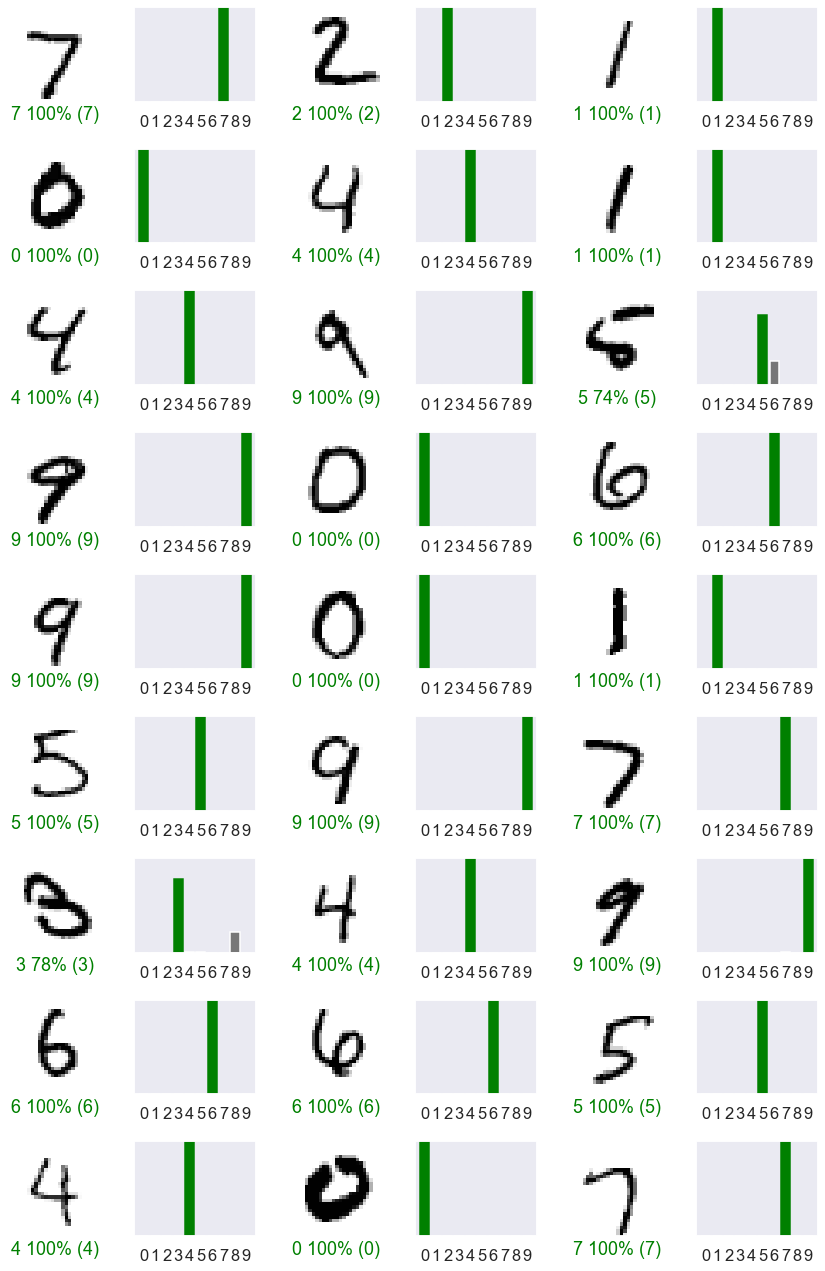

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 9
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()